In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer
from matplotlib.widgets import PolygonSelector
from matplotlib.backend_bases import MouseButton
import json as js

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [2]:
# Jest to specjalnie stworzona klasa która pozwala stworzyć wielokąt
# Działa to w ten sposób że lewym przyciskiem myszy możemy umieszczać punkty które odrazu są łączone
# Lewym przyciskiem ostatni umieszczony punkt jest łączony z początkowym
# Po zakończeniu działania dostajemy liste punktów
class PolygonBuilder:
    def __init__(self, line,ax,color):
        self.line = line
        self.ax = ax
        self.xs = []
        self.ys = []
        self.points = []
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)
    def __call__(self, event):
        if event.button is MouseButton.RIGHT:
            self.xs.append(self.xs[0])
            self.ys.append(self.ys[0])
            self.ax.scatter(self.xs, self.ys, s=20, color='red')
            self.ax.plot(self.xs, self.ys, color='red')
            self.line.figure.canvas.draw()
            self.line.figure.canvas.mpl_disconnect(self.cid)
            matplotlib.pyplot.close(self)
        else:
            self.xs.append(event.xdata)
            self.ys.append(event.ydata)
            self.points.append((event.xdata,event.ydata))
            self.ax.scatter(self.xs, self.ys, s=20, color='red')
            self.ax.plot(self.xs,self.ys,color='red')
            self.line.figure.canvas.draw()


In [3]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]
       

In [4]:
def draw_polygon(polygon):
    vis = Visualizer()
    vis.clear()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [5]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    vis.clear()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [6]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    vis.clear()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

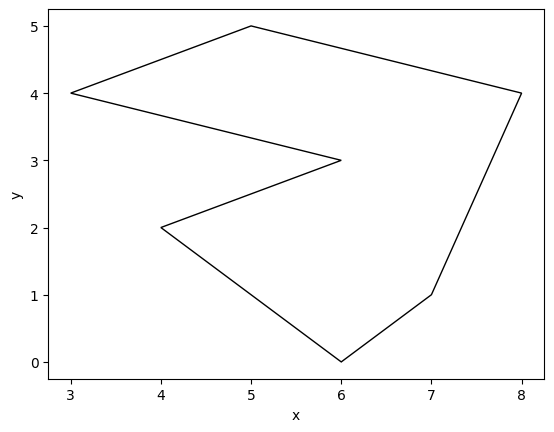

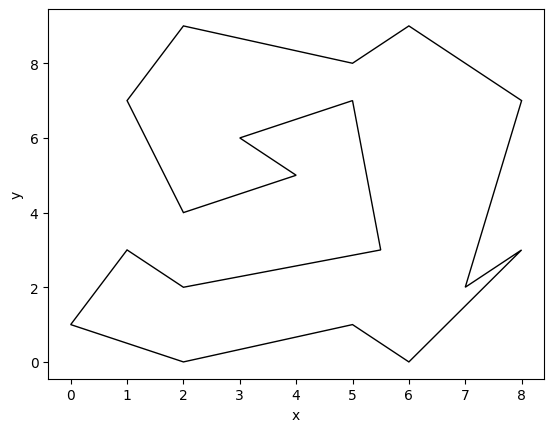

In [7]:
draw_polygon(polygon_example_1)
draw_polygon(polygon_example_2)

Do tego celu wygeneruj wielokąt.

In [8]:
def polygon_points():
    print("Prawym przyciskiem myszy umieszczamy punkty")
    print("Lewym przyciskiem zakańczamy w ten sposób że łączy ostatni dodany punkt z początkowym")
    print("Po kliknięciu lewego przycisku nie można dodawać punktów")
    print("UWAGA: Punkty umieszczane powinny być przeciwnie do ruchu wskazówek zegara")
    %matplotlib ipympl
    data = np.zeros((100, 100, 4))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    line = ax.imshow(data,extent=(0,200,0,200))
    linebuilder=PolygonBuilder(line,ax,'red')
    plt.show()
    %matplotlib inline
    return linebuilder.points,fig

Prawym przyciskiem myszy umieszczamy punkty
Lewym przyciskiem zakańczamy w ten sposób że łączy ostatni dodany punkt z początkowym
Po kliknięciu lewego przycisku nie można dodawać punktów
UWAGA: Punkty umieszczane powinny być przeciwnie do ruchu wskazówek zegara


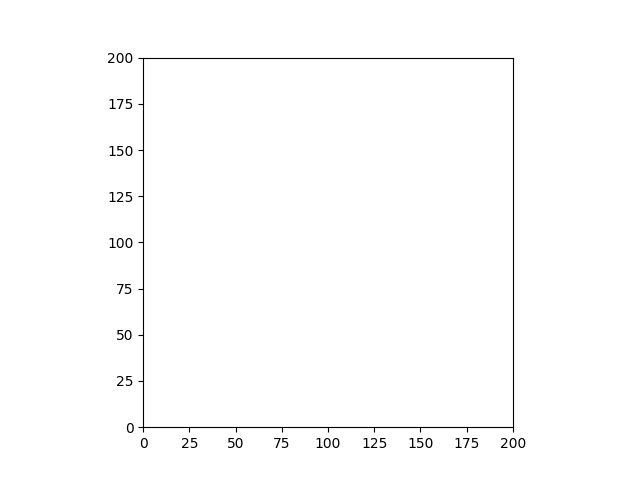

In [9]:
polygonn,show = polygon_points()

[(142.7489177489178, 65.17857142857144), (155.73593073593076, 109.00974025974028), (85.93073593073596, 136.06601731601734), (59.956709956709986, 90.61147186147187), (92.965367965368, 42.451298701298704)]


<Figure size 640x480 with 0 Axes>

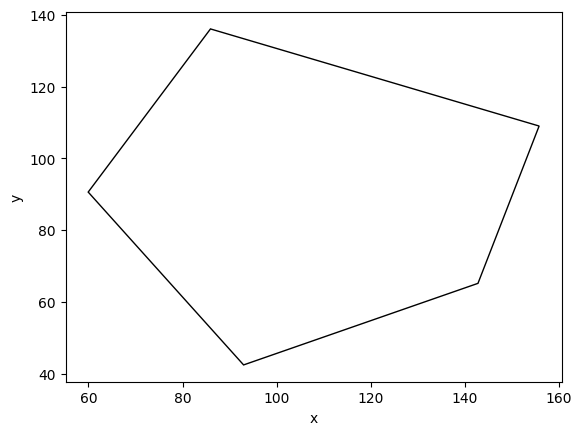

In [10]:
print(polygonn)
draw_polygon(polygonn)
show.clear()

In [11]:
def save_(points,name='figura'):
    name=name+'.json'
    with open(name, 'w') as file:
       file.write(js.dumps(points))
def read_(name='figura'):
    name=name+'.json'
    with open(name, 'r') as file:
        points = js.loads(file.read())
    return points

In [12]:
#save_(polygonn,'test') // poprawnie dziala

In [13]:
#test=read_('test') // poprawnie dziala
#print(test)

In [14]:
polygon = [(47.87662337662339, 84.83549783549783), (56.53463203463205, 68.06060606060606), (75.74458874458875, 59.4025974025974), (77.0974025974026, 44.25108225108224), (84.6731601731602, 35.993506493506487), (65.46320346320348, 16.38311688311687), (51.39393939393941, 4.478354978354957), (41.11255411255413, 13.677489177489164), (17.032467532467543, 18.0064935064935), (64.92207792207793, 23.958874458874448), (24.067099567099575, 29.099567099567082), (78.72077922077924, 32.34632034632034), (30.56060606060607, 42.898268398268385), (47.87662337662339, 54.8030303030303), (2.151515151515156, 59.94372294372294), (10.268398268398279, 64.8138528138528), (7.562770562770567, 71.84848484848484)]
polygon.reverse()

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [15]:
def index_of_max_y(points):
    max_y = float('-inf')
    index = -1
    for i in range(len(points)):
        if points[i][1] > max_y:
            max_y = points[i][1]
            index = i
    return index

def index_of_min_y(points):
    min_y = float('inf')
    index = -1
    for i in range(len(points)):
        if points[i][1] < min_y:
            min_y = points[i][1]
            index = i
    return index
def is_y_monotonic(polygon):
    n=len(polygon)
    max_y=index_of_max_y(polygon)
    min_y=index_of_min_y(polygon)
    prev=max_y
    curr=max_y+1
    while prev!=min_y: #lewy łancuch
        if curr==n:
            curr=0
        if polygon[curr][1]>polygon[prev][1]:
            return False
        prev=curr
        curr+=1

    prev=min_y
    curr=min_y+1
    while prev!=max_y: #Prawy łancuch
        if curr==n:
            curr=0
        if polygon[curr][1]<polygon[prev][1]:
            return False
        prev=curr
        curr+=1
    return True
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """

    raise Exception("Unimplemented")

Przeprowadź test poprawności powyższej funkcji.

In [16]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Sprawdź monotoniczność swojego wielokątu.

In [17]:

print(is_y_monotonic(polygon_example_1))
print(is_y_monotonic(polygon))

True
True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

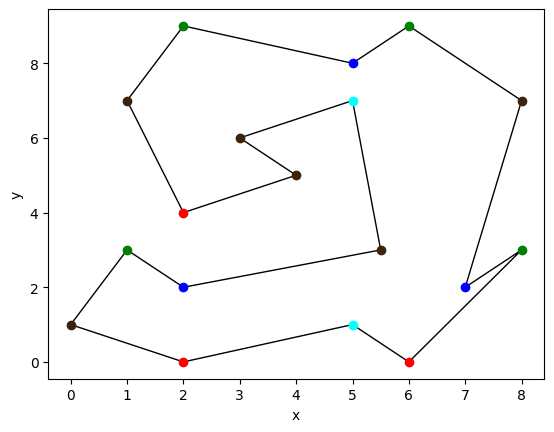

In [18]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [19]:
def mat_det_3x3(a, b, c):
    DET=(b[0]-a[0])*(c[1]-b[1])-(b[1]-a[1])*(c[0]-b[0])
    return DET

def orient(point, a, b, mat_det_func=mat_det_3x3, eps=10**-12):
    DET=mat_det_func(a,b,point)
    if DET > eps:
        return 1
    else:
        return -1
    


POCZATKOWY=0
KONCOWY=1
LACZACY=2
DZIELACY=3
PRAWIDLOWY=4
def color_vertex(polygon):
    n = len(polygon)
    Colors=[-1 for _ in range(n)]
    index=-1
    while index<n-1:
        if polygon[index-1][1]<polygon[index][1]<polygon[index+1][1] or polygon[index-1][1]>polygon[index][1]>polygon[index+1][1]:
            Colors[index]=PRAWIDLOWY
        elif polygon[index-1][1]<polygon[index][1] and polygon[index+1][1]<polygon[index][1]:
            if orient(polygon[index+1],polygon[index-1],polygon[index])==1:
                Colors[index]=POCZATKOWY
            else:
                Colors[index]=DZIELACY
        else:
            if orient(polygon[index+1],polygon[index-1],polygon[index])==1:
                Colors[index]=KONCOWY
            else:
                Colors[index]=LACZACY
        index+=1
    return Colors
    
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    

    raise Exception("Unimplemented")

Przeprowadź test poprawności powyższej funkcji. 

In [20]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

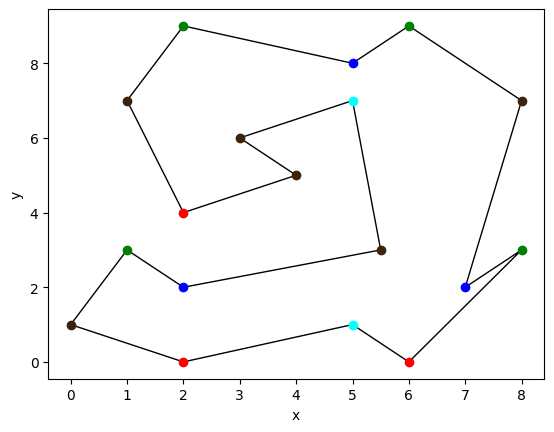

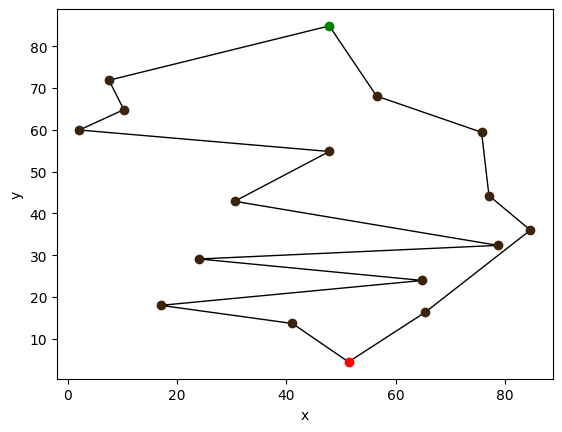

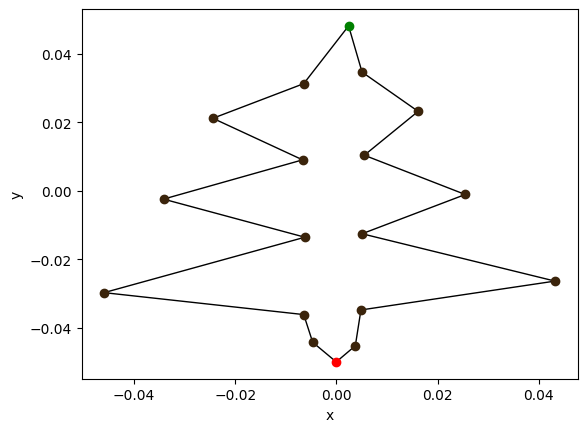

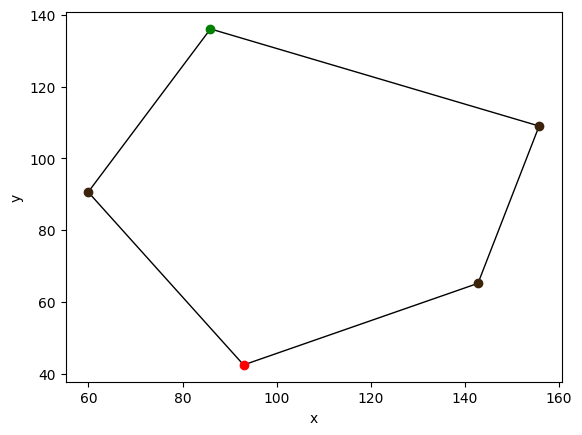

In [21]:
colors = color_vertex(polygon_example_2)
draw_polygon_colors(polygon_example_2,colors)
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)
choinka = [(0.002417337356075161, 0.04811376394010061),
(-0.006453630385860332, 0.03126327374402216),
(-0.024417340063279683, 0.021152979626375107),
(-0.006675404579408711, 0.009020626685198624),
(-0.034175404579408715, -0.0024377066481347104),
(-0.006231856192311938, -0.013559030177546477),
(-0.045929436837473234, -0.029735500765781776),
(-0.006453630385860332, -0.036138687040291585),
(-0.004679436837473225, -0.04422692233440923),
(-2.2178772957098802e-05, -0.0499560890010759),
(0.0037479825173654807, -0.04523795174617394),
(0.004856853485107421, -0.03479064782460531),
(0.04322378896897838, -0.026365402726566088),
(0.0050786276786558004, -0.012548000765781775),
(0.02548185348510741, -0.0010896674324484407),
(0.005522176065752574, 0.010368665900884907),
(0.01616733735607516, 0.02317503844990451),
(0.0050786276786558004, 0.034633371783237846)]
colors = color_vertex(choinka)
draw_polygon_colors(choinka,colors)
colors = color_vertex(polygonn)
draw_polygon_colors(polygonn,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

[(5, 5), (3, 4), (6, 3), (4, 2), (6, 0), (7, 1), (8, 4)]
[((5, 5), (6, 3)), ((6, 3), (7, 1)), ((6, 3), (8, 4)), ((6, 3), (6, 0))]


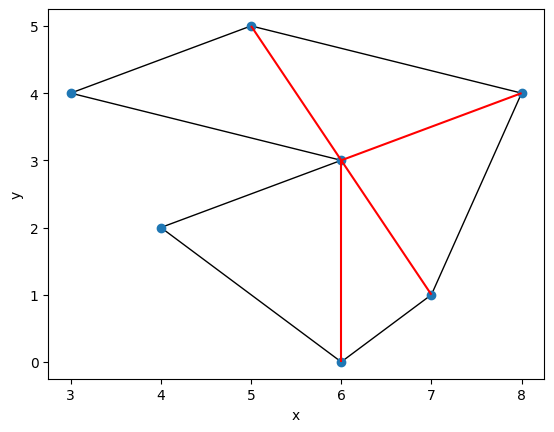

In [22]:
print(polygon_example_1)
print(polygon_example_tri)
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [23]:
  
def belongs(v1, v2, v3, branch):
    if branch == 0:
        return orient(v3,v1,v2)== 1
    else:
        return orient(v3,v1,v2) == -1

def triangulation(polygon):
    if not is_y_monotonic(polygon):
        return [];
    
    
    points=[]
    n=len(polygon)
    max_y=index_of_max_y(polygon)
    min_y=index_of_min_y(polygon)
    
    j=max_y
    while j!=min_y:
        if j==n:
            j=0
            if j==min_y: break
        points.append((polygon[j], 0,j))
        j+=1
    j=min_y
    while j!=max_y:
        if j==n:
            j=0
            if j==max_y: break
        points.append((polygon[j], 1,j))
        j+=1
    points.sort(reverse = True, key = lambda k: (k[0][1], k[0][0], k[1]))
    
    diagonals = []
    diagonals_points = []
    stack = []

    stack.append(points[0])
    stack.append(points[1])
    
    
    for i in range(2, len(points)):
        if stack[-1][1]!=points[i][1]:    
            while len(stack)>0:
                u=stack.pop() 
                if abs(u[2]-points[i][2])!=1 and abs(u[2]-points[i][2])!=n-1:
                    diagonals.append((u[0], points[i][0]))
                    diagonals_points.append([u[2], points[i][2]])
            stack.append(points[i-1])
            stack.append(points[i])
            
        else:
            u = stack.pop()
            while len(stack) >= 1 and belongs(points[i][0],stack[-1][0],u[0],points[i][1]):
                
                if abs(stack[-1][2]-points[i][2])!=1 and abs(stack[-1][2]-points[i][2])!=n-1:
                    diagonals.append((stack[-1][0], points[i][0]))
                    diagonals_points.append([stack[-1][2], points[i][2]])
                u = stack.pop()
            
            stack.append(u)
            stack.append(points[i])
            
            
    draw_polygon(polygon)
    draw_polygon_tri(polygon,diagonals)
    return diagonals_points
def triangulation2(polygon):
    if not is_y_monotonic(polygon):
        return [];
    
    
    points=[]
    n=len(polygon)
    max_y=index_of_max_y(polygon)
    min_y=index_of_min_y(polygon)
    
    j=max_y
    while j!=min_y:
        if j==n:
            j=0
            if j==min_y: break
        points.append((polygon[j], 0,j))
        j+=1
    j=min_y
    while j!=max_y:
        if j==n:
            j=0
            if j==max_y: break
        points.append((polygon[j], 1,j))
        j+=1
    points.sort(reverse = True, key = lambda k: (k[0][1], k[0][0], k[1]))
    
    diagonals = []
    diagonals_points = []
    stack = []

    stack.append(points[0])
    stack.append(points[1])
    
    
    for i in range(2, len(points)):
        if stack[-1][1]!=points[i][1]:    
            while len(stack)>0:
                u=stack.pop() 
                if abs(u[2]-points[i][2])!=1 and abs(u[2]-points[i][2])!=n-1:
                    diagonals.append((u[0], points[i][0]))
                    diagonals_points.append([u[2], points[i][2]])
            stack.append(points[i-1])
            stack.append(points[i])
            
        else:
            u = stack.pop()
            while len(stack) >= 1 and belongs(points[i][0],stack[-1][0],u[0],points[i][1]):
                
                if abs(stack[-1][2]-points[i][2])!=1 and abs(stack[-1][2]-points[i][2])!=n-1:
                    diagonals.append((stack[-1][0], points[i][0]))
                    diagonals_points.append([stack[-1][2], points[i][2]])
                u = stack.pop()
            
            stack.append(u)
            stack.append(points[i])
            
            
    draw_polygon(polygon)
    draw_polygon_tri(polygon,diagonals)
    triangulation=[]
    for i in range(-1,n-1):
        triangulation.append((polygon[i],polygon[i+1]))
    triangulation=triangulation+diagonals
    return diagonals,triangulation
def triangulationvis(polygon):
    if not is_y_monotonic(polygon):
        return [];
    vis=Visualizer()
    vis.add_point(polygon,color='blue')
    lines=[]
    for i in range(len(polygon)-1):
        lines.append((polygon[i],polygon[i+1]))
    lines.append((polygon[-1],polygon[0]))
    vis.add_line_segment(lines,color='blue')
    to_remove = []
    
    points=[]
    n=len(polygon)
    max_y=index_of_max_y(polygon)
    min_y=index_of_min_y(polygon)
    
    j=max_y
    while j!=min_y:
        if j==n:
            j=0
            if j==min_y: break
        points.append((polygon[j], 0,j))
        j+=1
    j=min_y
    while j!=max_y:
        if j==n:
            j=0
            if j==max_y: break
        points.append((polygon[j], 1,j))
        j+=1
    points.sort(reverse = True, key = lambda k: (k[0][1], k[0][0], k[1]))
    
    diagonals = []
    diagonals_points = []
    stack = []

    stack.append(points[0])
    stack.append(points[1])
    
    # ls=vis.add_point(points[0][0],color='red')
    # to_remove.append(ls)
    # ls=vis.add_point(points[1][0],color='red')
    # to_remove.append(ls)
    for i in range(2, len(points)):
        if stack[-1][1]!=points[i][1]:
            ls=vis.add_point(points[i][0],color='red')
            to_remove.append(ls)
            for j in range(len(stack)):
                
                ls=vis.add_point(stack[j][0],color='red')
                to_remove.append(ls)
            while len(stack)>0:
                u=stack.pop()
                if abs(u[2]-points[i][2])!=1 and abs(u[2]-points[i][2])!=n-1:
                    diagonals.append((u[0], points[i][0]))
                    diagonals_points.append([u[2], points[i][2]])
                    vis.add_line_segment((u[0], points[i][0]),color='red')
                # vis.remove_figure(to_remove.pop())
            while len(to_remove)>0:
                vis.remove_figure(to_remove.pop())
            if i==len(points)-1: break
            stack.append(points[i-1])
            stack.append(points[i])
            
           
            
            ls=vis.add_point(points[i-1][0],color='red')
            to_remove.append(ls)
            ls=vis.add_point(points[i][0],color='red')
            to_remove.append(ls)
        else:
            u = stack.pop()
            ls=vis.add_point(points[i][0],color='red')
            to_remove.append(ls)
            ls=vis.add_point(u[0],color='red')
            to_remove.append(ls)
            ls=vis.add_point(stack[-1][0],color='red')
            to_remove.append(ls)
            
            while len(stack) >= 1 and belongs(points[i][0],stack[-1][0],u[0],points[i][1]):
                
                if abs(stack[-1][2]-points[i][2])!=1 and abs(stack[-1][2]-points[i][2])!=n-1:
                    diagonals.append((stack[-1][0], points[i][0]))
                    diagonals_points.append([stack[-1][2], points[i][2]])
                    vis.add_line_segment((stack[-1][0], points[i][0]),color='red')
                vis.remove_figure(to_remove.pop())
                vis.remove_figure(to_remove.pop())
                u = stack.pop()
                if len(stack)==0: break
                ls=vis.add_point(u[0],color='red')
                to_remove.append(ls)
                ls=vis.add_point(stack[-1][0],color='red')
                to_remove.append(ls)
            while len(to_remove)>0:
                vis.remove_figure(to_remove.pop())
            if i==len(points)-1: break
            stack.append(u)
            stack.append(points[i])
            ls=vis.add_point(u[0],color='red')
            to_remove.append(ls)
            ls=vis.add_point(points[i][0],color='red')
            to_remove.append(ls)
            
    # print(diagonals_points)
    draw_polygon(polygon)
    draw_polygon_tri(polygon,diagonals)
    triangulation=[]
    for i in range(-1,n-1):
        triangulation.append((polygon[i],polygon[i+1]))
    triangulation=triangulation+diagonals
    return vis,diagonals,triangulation


Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.141s


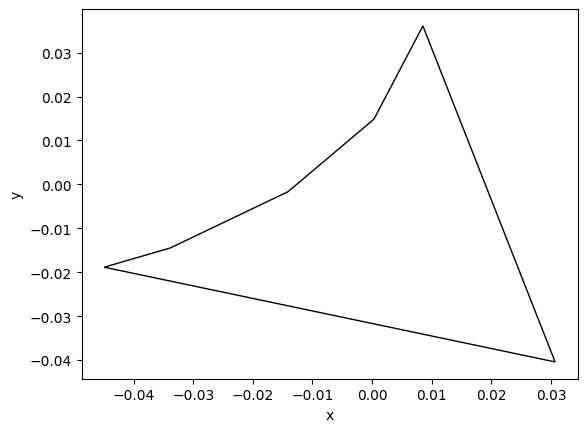

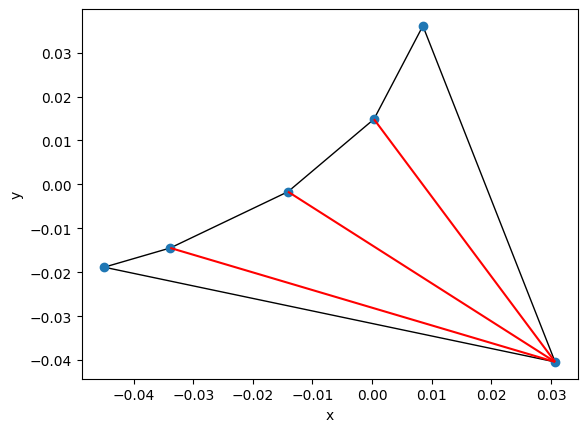

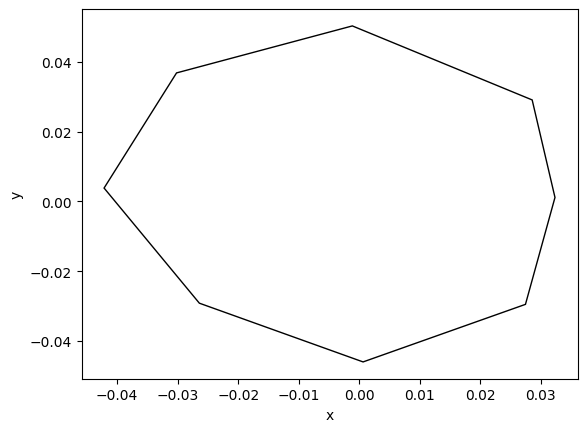

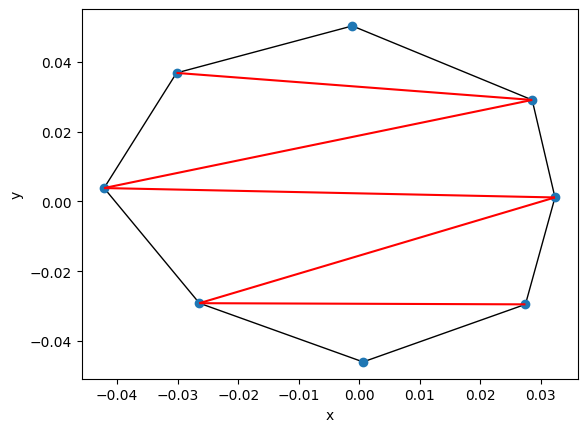

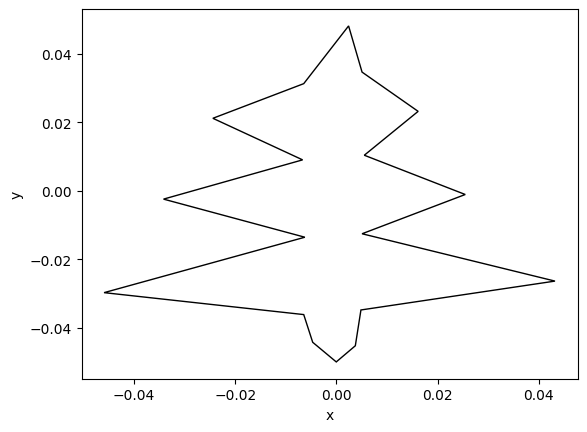

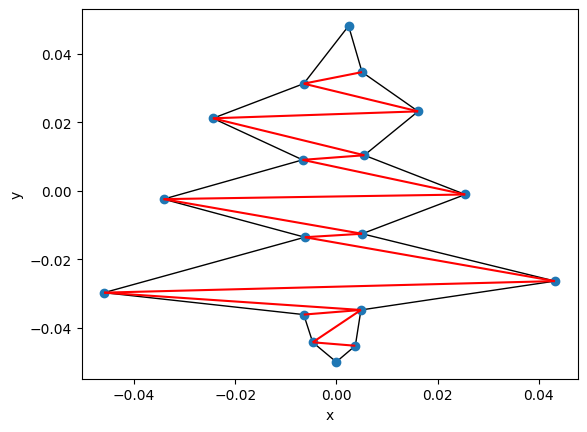

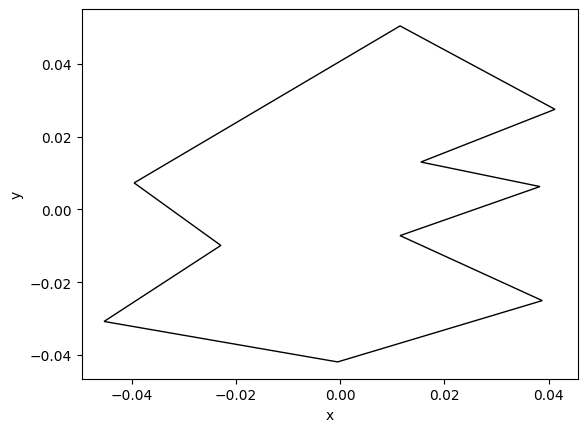

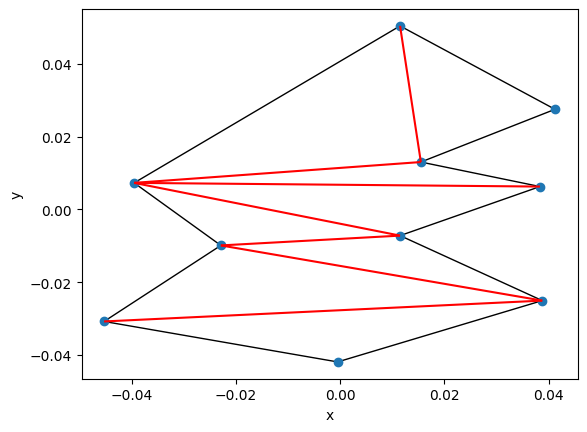

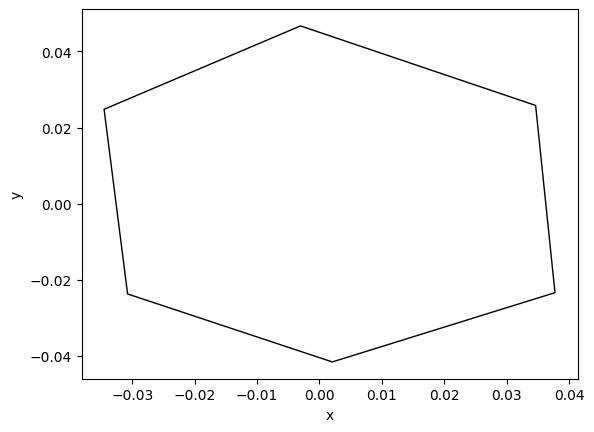

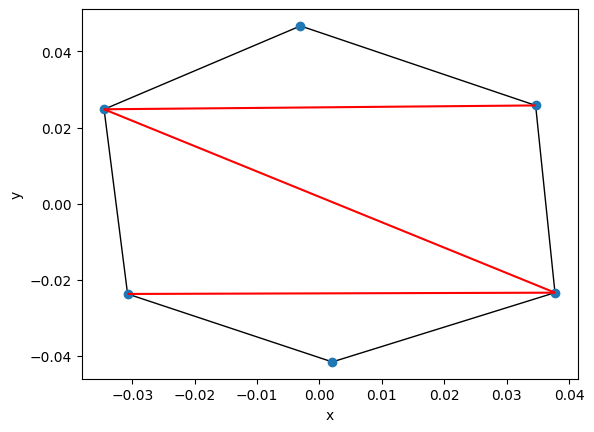

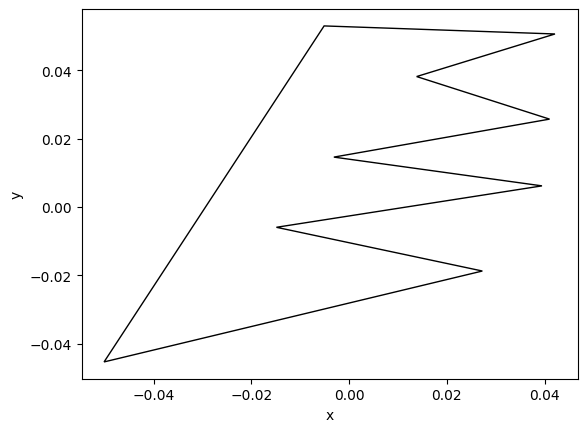

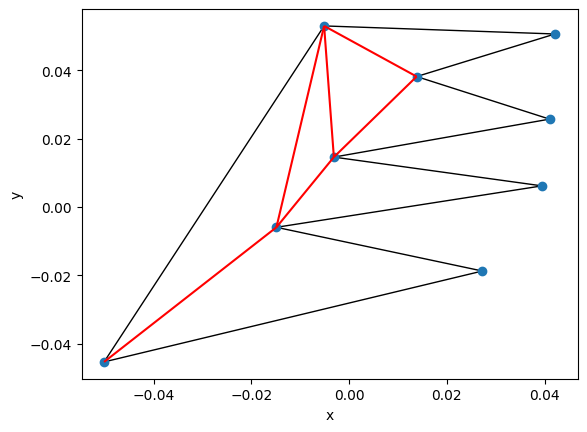

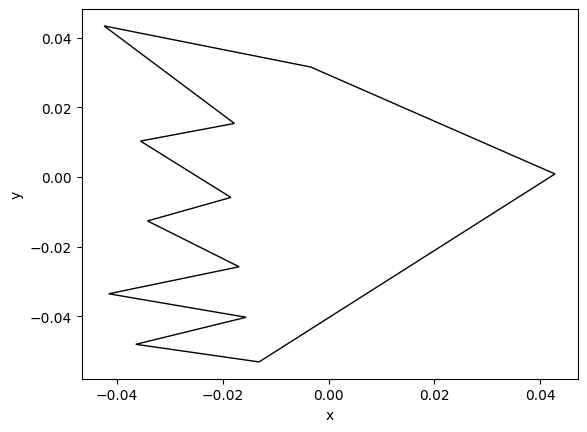

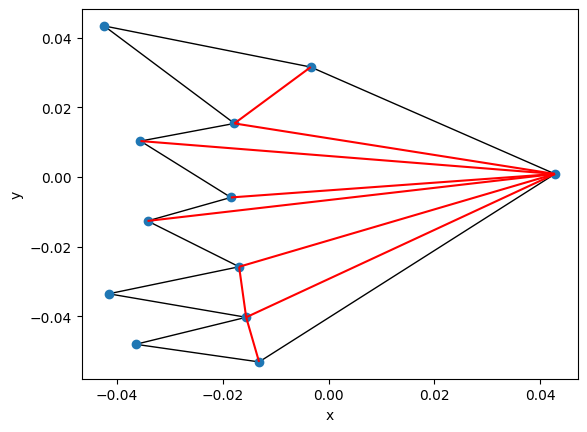

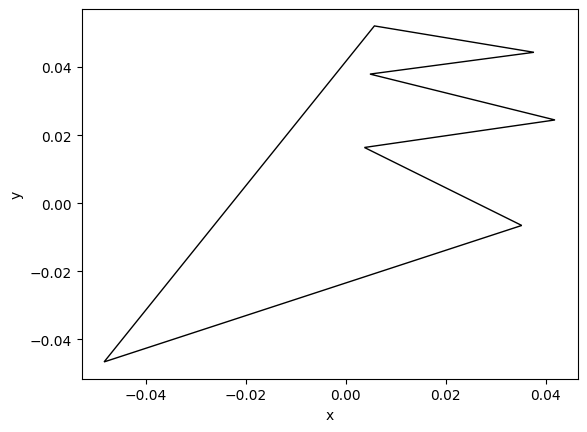

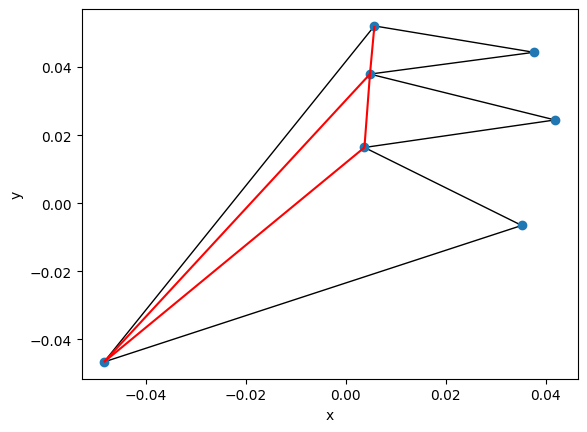

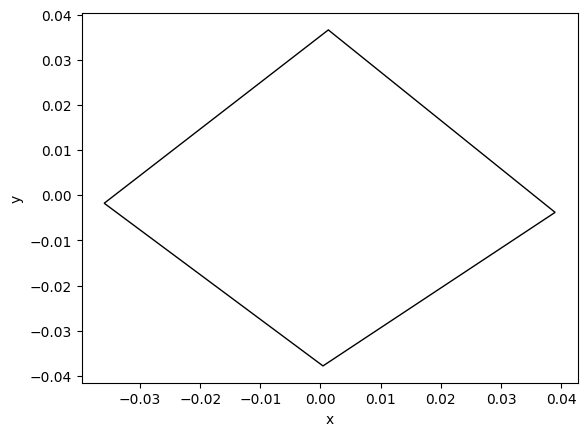

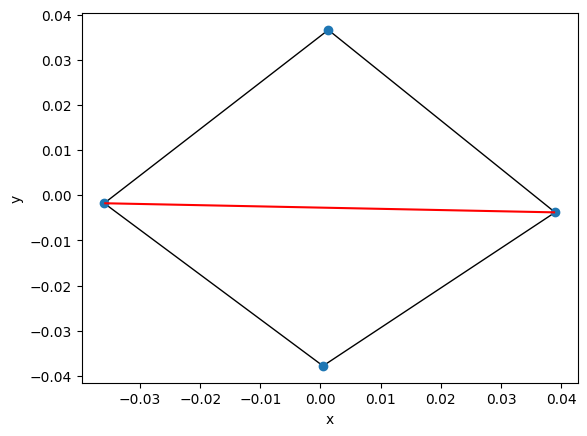

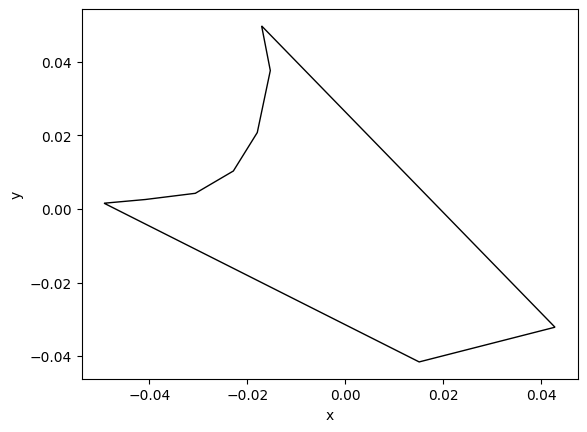

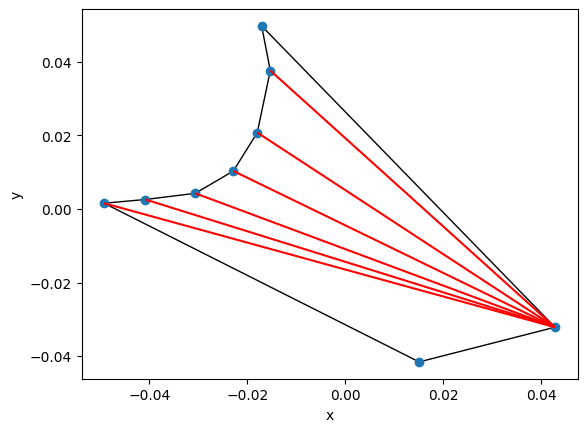

In [24]:
Test().runtest(3, triangulation)

Zwizualizuj powstały wielokąt podzielony na trójkąty.

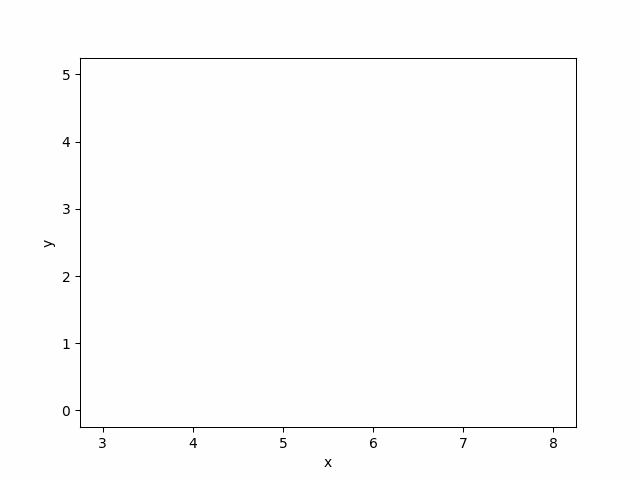

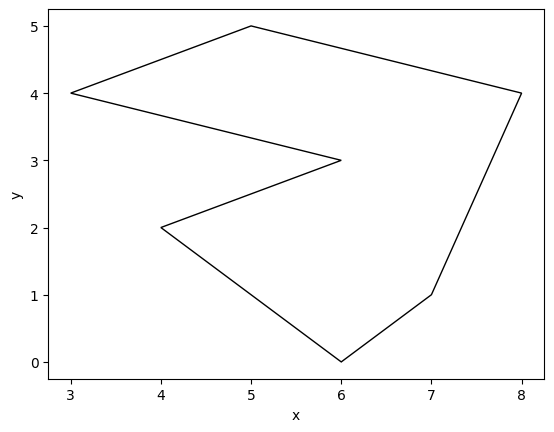

In [26]:
polygon10=[(0.04277192608002693, -0.032150734265645346),
(-0.01710710617803759, 0.049742648087295865),
(-0.015332912629650496, 0.03761029514611938),
(-0.017994202952231135, 0.020759804950040955),
(-0.022873235210295655, 0.010312501028472323),
(-0.0306353319844892, 0.004246324557884082),
(-0.04083694488771501, 0.002561275538276231),
(-0.04926436424255372, 0.0015502461265115286),
(0.015050151886478541, -0.04158700877544927)]
vis,diagonals,triangulation = triangulationvis(polygon_example_1)
vis.show_gif(interval=200)


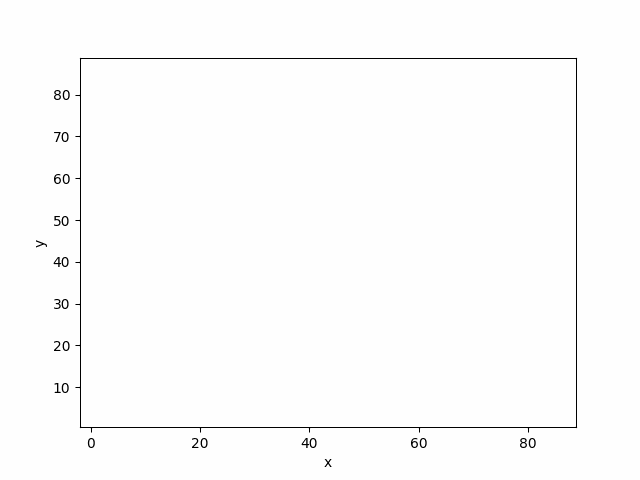

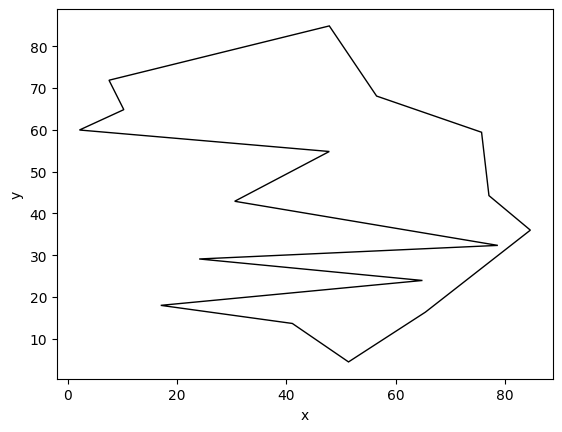

In [30]:
vis,diagonals,triangulation = triangulationvis(polygon)
vis.show_gif(interval=500)

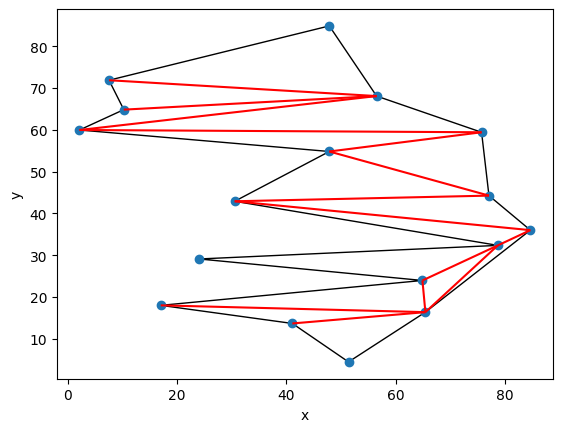

In [31]:
draw_polygon_tri(polygon,diagonals)

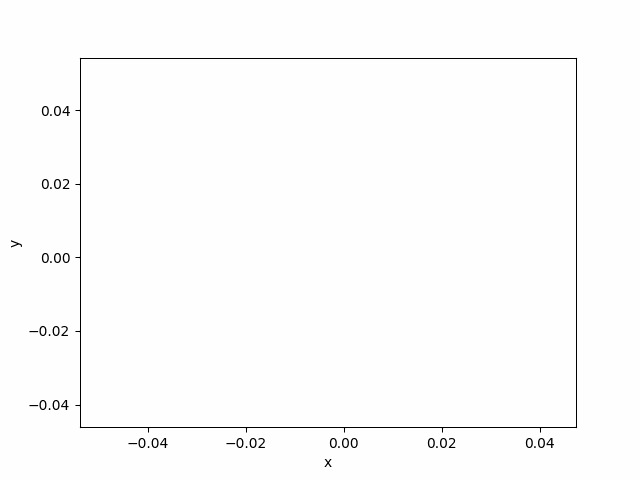

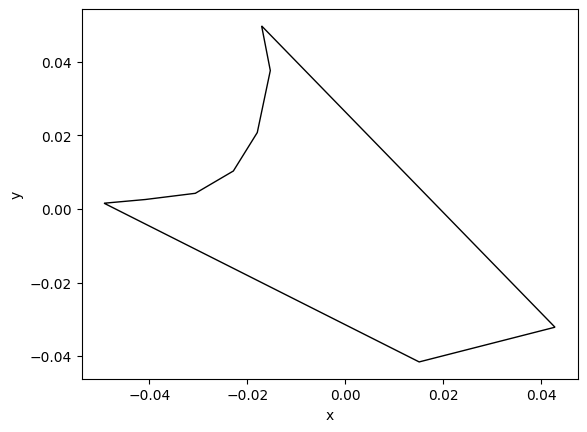

In [28]:
vis,diagonals,triangulation = triangulationvis(polygon10)
vis.show_gif(interval=500)

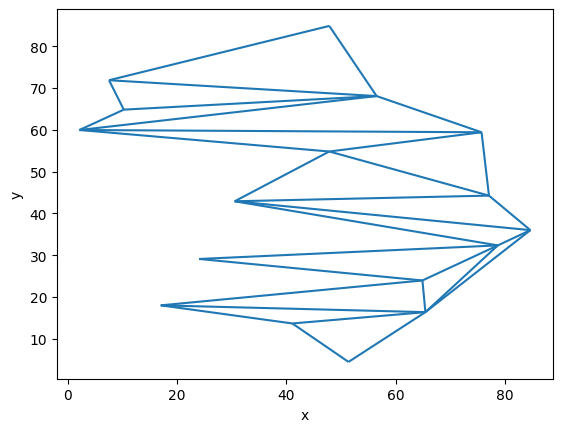

In [32]:
vis=Visualizer()
for i in range(len(triangulation)):
    vis.add_line_segment(triangulation[i])
vis.show()
#save_(triangulation,'triangulation') //zapis dziala

In [54]:
#print(read_('triangulation'))//odczyt dziala